In [1]:
 '''
Author information:
Joey R. Muffoletto
University of Texas at Austin
Autonomous Systems Group
jrmuff@utexas.edu
'''

In [2]:
import os

import realtime_manager as rm 
import graph_manager as gm
import reworked_graph as rg
import copy

# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

In [3]:
'''
manager configurations

traffic test globals
'''
NUM_TOWERS = 10
TAU_MAX = 5
TAU = 0

LOW_TRAFFIC_MULTIPLIER = 1
HIGH_TRAFFIC_MULTIPLIER = 3

MIN_LOW_TRAFFIC = 0
MAX_LOW_TRAFFIC = LOW_TRAFFIC_MULTIPLIER * NUM_TOWERS/int(2)

MIN_HIGH_TRAFFIC = MAX_LOW_TRAFFIC*2
MAX_HIGH_TRAFFIC = HIGH_TRAFFIC_MULTIPLIER * NUM_TOWERS

MIN_TTL = 0
MAX_TTL = 3

DEFAULT_EMPTY_STATE = rg.State((),(),{"0" : 6})
rm.configure_realtime(tau=TAU, override_default_empty_state=DEFAULT_EMPTY_STATE)

# HIGH_TRAFFIC_FREQUENCY = .1 # use rand.random() = [0.0, 1.0], or, just add this value until = 1 then reset
HIGH_TRAFFIC_TRIGGER = 8
NUM_TIME_STEPS = 40



In [4]:
'''
Input generation functions

low traffic is some random number between min_low_traffic and max_low_traffic, high traffic is the same with high

choose a random tower index everytime we add one

high traffic occurs everytime HIGH_TRAFFIC_FREQUENCY * TIME_STEPS is a whole number

TTL is a random number between MIN_TTL and MAX_TTL
'''
import random
random.seed(10)
def generate_traffic(min_traffic, max_traffic):
    additional_requests_dict = dict()
#     counter = 0
    requests_to_add = random.randint(min_traffic, max_traffic)
    for i in range(requests_to_add):
#         if counter == NUM_TOWERS:
#             counter = 0
#         tower_to_add_to = counter
#         counter+=1
        tower_to_add_to = random.randint(0, NUM_TOWERS-1) # NUM_TOWERS is OOB
        request_to_add = ('no_pref', random.randint(MIN_TTL, MAX_TTL))
#         request_to_add = ('no_pref', 5)
        if tower_to_add_to in additional_requests_dict:
            additional_requests_dict[tower_to_add_to].append(request_to_add)
        else:
            additional_requests_dict[tower_to_add_to] = [request_to_add]
    return additional_requests_dict
            
def generate_low_traffic():
    return generate_traffic(MIN_LOW_TRAFFIC, MAX_LOW_TRAFFIC)
    
def generate_high_traffic():
    return generate_traffic(MIN_HIGH_TRAFFIC, MAX_HIGH_TRAFFIC)

In [5]:
'''
Input Generation
'''
input = []
high_traffic_counter = 1
for time in range(NUM_TIME_STEPS):
    if high_traffic_counter == HIGH_TRAFFIC_TRIGGER:
        high_traffic_counter = 1
        input.append([generate_high_traffic()])
    else:
        high_traffic_counter += 1
        input.append([generate_low_traffic()])
        
initial_system = [copy.deepcopy(gm.return_tower(0, 1, [],[6])) for i in range(NUM_TOWERS)]

In [6]:
'''
Input statistics:
'''
requests_per_tower = [0 for i in range(NUM_TOWERS)]
for time_step in range(len(input)):
    for i in range(NUM_TOWERS):
        if i in input[time_step][0]:
            requests_per_tower[i]+=len(input[time_step][0][i])
for i in range(NUM_TOWERS):
    print("tower " + str(i) + "has " + str(requests_per_tower[i]) + " requests")

tower 0has 19 requests
tower 1has 17 requests
tower 2has 21 requests
tower 3has 19 requests
tower 4has 15 requests
tower 5has 20 requests
tower 6has 22 requests
tower 7has 23 requests
tower 8has 18 requests
tower 9has 21 requests


In [7]:
'''
INPUT SAVING (DO NOT RE-RUN WILLY NILLY MY FRIEND)
'''
input_copy = copy.deepcopy(input)
# for _dict in input_copy:
#     print(_dict)

initial_system_copy = copy.deepcopy(initial_system)

In [8]:
'''
data collection
'''
_completed_states_per_tau = [[] for i in range(TAU_MAX)]
_timing_info_per_tau = [[] for i in range(TAU_MAX)]
for _tau in range(TAU_MAX):
    rm.configure_realtime(tau=_tau, override_default_empty_state=DEFAULT_EMPTY_STATE)
    traces, timings = rm.main_loop(initial_system_copy, copy.deepcopy(input_copy))
    _completed_states_per_tau[_tau] = copy.deepcopy(traces)
    _timing_info_per_tau[_tau] = copy.deepcopy(timings)
    gm.reset_globals()
#     print(traces)
    # _completed_states, _timing_info = rm.main_loop(initial_system_copy, input_copy)


additional requests for tower 0 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 3 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 7 = [('no_pref', 0), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 2)]
[('no_pref', 0), ('no_pref', 2)]
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [0, 2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2387370340002235
	round 0 breakdown :: 
	 tower 0 took 0.004471781001484487 to find most expensive request and took 0.013218315998528851 to synthesize with published r

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.24301080500299577
	round 0 breakdown :: 
	 tower 0 took 0.0022194379998836666 to find most expensive request and took 0.0021042040025349706 to synthesize with published request
	 tower 1 took 8.426999556832016e-06 to find most expensive request and took 0.02477468899814994 to synthesize with published request
	 tower 2 took 0.001982171001145616 to find most expensive request and took 0.02507319600044866 to synthesize with published request
	 tower 3 took 5.9109988796990365e-06 t

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.22654466699896147
	round 0 breakdown :: 
	 tower 0 took 6.965001375647262e-06 to find most expensive request and took 0.004021345997898607 to synthesize with published request
	 tower 1 took 5.027999577578157e-06 to find most expensive request and took 0.02249419500003569 to synthesize with published request
	 tower 2 to

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_co

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2857580300005793
	round 0 breakdown :: 
	 tower 0 took 7.538001227658242e-06 to find most expensive request and took 0.007034833000943763 to synthesize with published request
	 tower 1 took 0.0019570789991121273 to find most expensive request and took 0.022295377999398625 to synthesize with published request
	 tower 2 took 3.6130004446022213e-06 to find most expensive request and took 0.02229351899950416 to synthesize with published request
	 tower 3 took 0.0017414440007996745 t

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.28157196900065173
	round 0 breakdown :: 
	 tower 0 took 0.00201748499966925 to find most expensive request and took 0.008992779996333411 to synthesize with published request
	 tower 1 took 5.608999344985932e-06 to find most expensive request and took 0.021943247007584432 to synthesize with published request
	 tower 2 took 2.773998858174309e-06 to find most expensive request and took 0.021814823998283828 to synthesize with published request
	 tower 3 took 2.3469983716495335e-06 to find most expensive request and took 0.022017091992893256 to synthesize with published request
	 tower 4 took 2.354998287046328e-06 to find most expensive requ

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of acceptin

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.258901782999601
	round 0 breakdown :: 
	 tower 0 took 0.001956017000338761 to find most expensive request and took 0.0055819279987190384 to synthesize with published request
	 tower 1 took 0.0017591670002730098 to find most expensive request and took 0.0204698829948029 to synthesize with published request
	 tower 2 took 3.257999924244359e-05 to find most expensive request and took 0.020228538000083063 to synthesize with published request
	 tower 3 took 0.008469080003123963 to find most expensive request and took 0.06322511998951086 to synthesize with published request
	 tower 4 took 3.311000909889117e-06 to find most expensive request a

Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2],

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.25081928800136666
	round 0 breakdown :: 
	 tower 0 took 7.003000064287335e-06 to find most expensive request and took 0.010294680996594252 to synthesize with published request
	 tower 1 took 3.1301999115385115e-05 to find most expensive request and took 0.024495011995895766 to synthesize with published request
	 tower 2 

Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]

Tower has requests :: ['no_pref'] and times of [3] and ports of {'0': 4}
Tower has requests :: ('no_pref',) and times of (-1,) and ports of {'0': 5}
Tower has requests :: ('no_pref',) and times of (0,) and ports of {'0': 5}
Tower has requests :: ('no_pref', 'no_pref') and times of (1, 0) and ports of {'0': 3}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [0, 3, 3] and ports of {'0': 5}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 0, 0, 1, 1] and ports of {'0': 0}
Tower has requests :: ['no_pref', 'no_pref'] and times of [2, 1] and ports of {'0': 4}
Tower has requests :: ('no_pref', 'no_pref') and times of (1, 1) and ports of {'0': 5}
Tower has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref') and times of (1, 2, 0, 1, 2) and ports of {'0': 4}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower'

Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2636372469969501
	round 0 breakdown :: 
	 tower 0 took 0.001964602000953164 to find most expensive request and took 0.007663685995794367 to synthesize with publi

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]


accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2756670090020634
	round 0 breakdown :: 
	 tower 0 took 7.506001566071063e-06 to find most expensive request and took 0.006867026000691112 to synthesize with publ

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2690262719988823
	round 0 breakdown :: 
	 tower 0 took 7.362999895121902e-06 to find most expensive request and took 0.033408728002541466 to synthesize with published request
	 tower 1 took 0.005459985997731565 to find most expensive request and took 0.042324808997364016 to synthesize with published request
	 tower 2 too

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.20334915400235332
	round 0 breakdown :: 
	 tower 0 took 7.2789989644661546e-06 to find most expensive request and took 0.002081883001665119 to synthesize with published request
	 tower 1 took 2.673001290531829e-06 to find most expensive request and took 0.021304917994712014 to synthesize with published request
	 tower 2 

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.22956195100050536
	round 0 breakdown :: 
	 tower 0 took 0.0019131720000586938 to find most expensive request and took 0.005434277998574544 to synthesize with pub

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.238219398001

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.23891293299675453
	round 0 breakdown :: 
	 tower 0 took 0.0021891239994147327 to find most expensive request and took 0.008404226999118691 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.19992087699938565
	round 0 breakdown :: 
	 tower 0 took 7.787999493302777e-06 to find most expensive request and took 0.0022139880020404235 to synthesize with published request
	 tower 1 took 2.796998160192743e-06 to find most expensive request and took 0.020060410995938582 to synthesize with published request
	 tower 2 

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of acceptin

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3130597620001936
	round 0 breakdown :: 
	 tower 0 took 0.0018549460000940599 to find most expensive request and took 0.012334654005826451 to synthesize with published request
	 tower 1 took 0.0019751389991142787 to find most expensive request and took 0.05369826599780936 to synthesize with published request
	 tower 2 too

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.21808877999865217
	round 0 breakdown :: 
	 tower 0 took 0.0017125000013038516 to find most expensive request and took 0.004620028998033376 to synthesize with published request
	 tower 1 took 6.599999323952943e-06 to find most expensive request and took 0.02146506500139367 to synthesize with published request
	 tower 2 took 2.802000381052494e-06 to find most expensive request and took 0.020325985009549186 to synthesize with published request
	 tower 3 took 2.2550011635757983e-06 to find most expensive request and took 0.0210940879987902 to synthesize with published request
	 tower 4 took 2.3700013116467744e-06 to find most expensive request and took 0.02296212700821343 to synthesize with published request
	 tower 5 took 2.344997483305633e-06 to find most expensive request and took 0.021180674990

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

[('no_pref', 3), ('no_pref', 0)]
additional requests for tower 4 = [('no_pref', 3)]
[('no_pref', 3)]
additional requests for tower 8 = [('no_pref', 3)]
[('no_pref', 3)]
Tower has requests :: () and times of () and ports of {'0': 5}
Tower has requests :: ('no_pref', 'no_pref') and times of (-1, 1) and ports of {'0': 5}
Tower has requests :: () and times of () and ports of {'0': 5}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [1, 0, 0, 2, -1] and ports of {'0': 5}
Tower has requests :: ['no_pref', 'no_pref'] and times of [1, 2] and ports of {'0': 5}
Tower has requests :: ('no_pref', 'no_pref') and times of (0, 1) and ports of {'0': 5}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ('no_pref', 'no_pref', 'no_pref') and times of (-1, 1, 1) and ports of {'0': -3}
Tower has requests :: ['no_pref'] and times of [2] and ports of {'0': 2}
Tower has requests :: ('no_pref',) and times of (-2,) and ports of {'0': 5

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

Tower's current cost = [4, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2273327650000283
	round 0 breakdown :: 
	 tower 0 took 0.0017354009978589602 to find most expensive request and took 0.00616903199988883 to synthesize with published request
	 tower 1 took 6.186000973684713e-06 to find most expensive request and took 0.020582467004715 to synthesize with published request
	 tower 2 took 2.8049980755895376e-06 to find most expensive request and took 0.021232762006548 to synthesize with published request
	 tower 3 took 0.004565605999232503 to find most expensive request and took 0.03133306900053867 to synthesize with published request
	 tower 4 took 3.130997356493026e-06 to find most expensive request and 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.24608548600008362
	round 0 breakdown :: 
	 tower 0 took 2.580499858595431e-05 to find most expensive request and took 0.010233569995762082 to synthesize with published request
	 tower 1 took 2.8289978217799217e-06 to find most expensive request and took 0.020328573998995125 to synthesize with published request
	 tower 2 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.27790801399896736
	round 0 breakdown :: 
	 tower 0 took 2.369399953749962e-05 to find most expensive request and took 0.010216474005574128 to synthesize with published request
	 tower 1 took 3.292299879831262e-05 to find most expensive request and took 0.024333172004844528 to synthesize with published request
	 tower 2 t

Tower's current cost = [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]

Tower's current cost = [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.30473247800182435
	round 0 breakdown :: 
	 tower 0 took 0.0021351699979277328 to find most expensive request and took 0.008329771000717301 to synthesize with published request
	 tower 1 took 6.886999472044408e-06 to find most expensive request and took 0.025197128004947444 to synthesize with published request
	 tower 2 t

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of acce

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2820538330015552
	round 0 breakdown :: 
	 tower 0 took 6.938000296941027e-06 to find most expensive request and took 0.007082651998643996 to synthesize with publ

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower in

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.23485874099787907
	round 0 breakdown :: 
	 tower 0 took 0.002306743997905869 to find most expensive request and took 0.009233715001755627 to synthesize with published request
	 tower 1 took 0.004574070000671782 to find most expensive request and took 0.03330007599652163 to synthesize with published request
	 tower 2 took 3.1809977372176945e-06 to find most expensive request and took 0.026703616003942443 to synthesize with published request
	 tower 3 took 5.404999683378264e-06 to find most expensive request and took 0.020758848993864376 to synthesize with published request
	 tower 4 took 2.712000423343852e-06 to find most expensive request and took 0.022618505998252658 to synthesize with published request
	 tower 5 took 2.3899992811493576e-06 to find most expensive request and took 0.02114088700

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2169433620001655
	round 0 breakdown :: 
	 tower 0 took 0.001884148998215096 to find most expensive request and took 0.0064692429987189826 to synthesize with published request
	 tower 1 took 0.0036738599992531817 to find most expensive request and took 0.025446734001889126 to synthesize with published request
	 tower 2 took 0.001996015998884104 to find most expensive request and took 0.025667157002317254 to synthesize with published request
	 tower 3 took 5.583999154623598e-06 to find most expensive request and took 0.021060571001726203 to synthesize with published request
	 tower 4 took 2.8180002118460834e-06 to find most expensive request and took 0.020280420008930378 to synthesize with published request
	 tower 5 took 0.0020365279997349717 to find most expensive request and took 0.02499887299

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2653214290003234
	round 0 breakdown :: 
	 tower 0 took 7.790000381646678e-06 to find most expensive request and took 0.0021395949988800567 to synthesize with published request
	 tower 1 took 0.0017944129976967815 to find most expensive request and took 0.02300971099975868 to synthesize with published request
	 tower 2 took 0.004055875000631204 to find most expensive request and took 0.03240521899351734 to synthesize with published request
	 tower 3 took 3.735000063898042e-06 to find most expensive request and took 0.024841182996169664 to synthesize with published request
	 tower 4 took 2.6980014808941633e-06 to find most expensive reque

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.23925909999888972
	round 0 breakdown :: 
	 tower 0 took 7.195001671789214e-06 to find most expensive request and took 0.002081586000713287 to synthesize with published request
	 tower 1 took 2.7520000003278255e-06 to find most expensive request and took 0.023575005998281995 to synthesize with published request
	 tower 2 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.23819882400130155
	round 0 breakdown :: 
	 tower 0 took 1.1725001968443394e-05 to find most expensive request and took 0.006742274003045168 to synthesize with pu

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

Tower's current cost = [3, 0]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
c

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2],

Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [3, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [3, 0]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting r

Tower's current cost = [5, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [2, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.32594347700069193
	round 0 breakdown :: 
	 tower 0 took 7.25199788575992e-06 to find most expensive request and took 0.011955088997638086 to synthesize with publ

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

Tower's current cost = [3, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]

Tower's current cost = [4, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [2, 0]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]

Full trace including new requests = [State currently has requests :: ('no_pref',) Time states of :: (1,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref') Time states of :: (0, 1, -2, -1, 0, 1) Port states of :: {'0': 5} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref') Time states of :: (-1, 0, -2, -1, 0) Port states of :: {'0': 4} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref') Time states of :: (-2, -1, -2, -1) Port states of :: {'0': 3} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref') Time states of :: (-3, -2, -2) Port states of :: {'0': 2} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref') Time states of :: (-3, -3) Port states of :: {'0': 1} Labels :: ()  
, State currently has requests :: ('no_pref',) Time states of :: (-4,) 

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [-1] and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [-2] and ports of {'0': -5}
Tower has requests :: ['no_pref'] and times of [-1] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ('no_pref', 'no_pref') and times of (-3, -1) and ports of {'0': -1}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [2, 0]
Tower's current cost = [1, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive reques

lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting reque

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting requ

Tower's current cost = [1, 0]
Tower's current cost = [3, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [1, 0]
Most expensive request cost: [2, 0]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3133964240005298
	round 0 breakdown :: 
	 tower 0 took 3.261399979237467e-05 to find most expensive request and took 0.010345948005124228 to synthesize with published request
	 tower 1 took 0.005779305000032764 to find most expensive request and took 0.053907430003164336 to synthesize with published request
	 tower 2 took 3.182001819368452e-06 to find most expensive request and took 0.023451795997971203 to synthesize with published request
	 tower 3 took 5.586000042967498e-06 to

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

]
additional requests for tower 2 = [('no_pref', 2)]
[('no_pref', 2)]
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 1}
Tower has requests :: ['no_pref'] and times of [0] and ports of {'0': 4}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 5}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.26673928600212093
	round 0 breakdown :: 
	 tower 0 took 9.638999472372234e-06 to find most expensive request and took 0.002356009001232451 to synthesize with published request
	 tower 1 took 5.474998033605516e-06 to find most expensive request and took 0.026979094011039706 to synthesize with published request
	 tower 2 t

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of acceptin

additional requests for tower 0 = [('no_pref', 3)]
additional requests for tower 3 = [('no_pref', 3)]
additional requests for tower 7 = [('no_pref', 0), ('no_pref', 2)]
Tower has requests :: ['no_pref'] and times of [2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [-1, 1] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower'

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2947939330006193
	round 0 breakdown :: 
	 tower 0 took 0.0020020629999635275 to find most expensive request and took 0.014586506000341615 to synthesize with publ

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3417221329982567
	round 0 breakdown :: 
	 tower 0 took 0.0021583289999398403 to find most expensive request and took 0.009960965999198379 to synthesize with publ

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

Tower has requests :: ['no_pref', 'no_pref'] and times of [-1, 1] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [0, -2, 0] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref'] and times of [0, -3, -1] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [-3, -2] and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [-1] and ports of {'0': 5}
Tower has requests :: ['no_pref'] and times of [1] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [-3, -2, -2, -1] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [-1, -2] and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref', 'no_pref', 'no_pref'] and times of [0, 0, -1, -1] and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [1, 0]
Tower's current cost = [2, 0]
Tower's current cost = [4, 0]
Tower's current cost = [5,

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.35908551000102307
	round 0 breakdown :: 
	 tower 0 took 7.966002158354968e-06 to find most expensive request and took 0.009140633999777492 to synthesize with pub

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3332045189999917
	round 0 breakdown :: 
	 tower 0 took 7.083999662427232e-06 to find most expensive request and took 0.010120040999026969 to synthesize with publ

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [3, 0]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting requ

Tower has requests :: ('no_pref', 'no_pref', 'no_pref') and times of (-3, -1, -1) and ports of {'0': -3}
Tower has requests :: ['no_pref'] and times of [0] and ports of {'0': 2}
Tower has requests :: ('no_pref',) and times of (-4,) and ports of {'0': 5}
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Tower's current cost = [0, 0]
Tower's current cost = [8, 0]
Tower's current cost = [1, 0]
Tower's current cost = [3, 0]
Tower's current cost = [0, 0]
Tower's current cost = [5, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [4, 0]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting re

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of acceptin

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.437521

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.33241949600051157
	round 0 breakdown :: 
	 tower 0 took 0.0030373659974429756 to find most expensive request and took 0.010877803000767017 to synthesize with published request
	 tower 1 took 0.0024771270000201184 to find most expensive request and took 0.026980825001373887 to synthesize with published request
	 tower 2 t

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.325430

Tower's current cost = [7, 0]
Tower's current cost = [0, 0]
Tower's current cost = [6, 0]
Tower's current cost = [5, 0]
Tower's current cost = [6, 0]
Tower's current cost = [5, 0]
Tower's current cost = [9, 0]
Tower's current cost = [1, 0]
Tower's current cost = [5, 0]
Tower's current cost = [7, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowes

Tower's current cost = [9, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [3, 0]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]

accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting requ

Full trace including new requests = [State currently has requests :: ('no_pref',) Time states of :: (-2,) Port states of :: {'0': 2} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref') Time states of :: (-3, -1, -2, -2, -1) Port states of :: {'0': 1} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref', 'no_pref') Time states of :: (-4, -2, -3, -2, -2) Port states of :: {'0': 0} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref', 'no_pref') Time states of :: (-5, -3, -3, -3) Port states of :: {'0': -1} Labels :: ()  
, State currently has requests :: ('no_pref', 'no_pref', 'no_pref') Time states of :: (-4, -4, -4) Port states of :: {'0': -2} Labels :: ('OVERFLOWED_PORT',)  
, State currently has requests :: ('no_pref', 'no_pref') Time states of :: (-5, -5) Port states of :: {'0': -3} Labels :: ('OVERFLOWED_PORT',)  
, State currently has requests :: ('no_pref',) T

accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.39532871000119485
	round 0 breakdown :: 
	 tower 0 took 0.0037061719995108433 to find most expensive request and took 0.012521155997092137 to synthesize with pub

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.33379563199923723
	round 0 breakdown :: 
	 tower 0 took 1.2661999789997935e-05 to find most expensive request and took 0.008305106999614509 to synthesize with published request
	 tower 1 took 3.3190008252859116e-06 to find most expensive request and took 0.025721137997607002 to synthesize with published request
	 tower 2

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3110376959994028
	round 0 breakdown :: 
	 tower 0 took 7.6260002970229834e-06 to find most expensive request and took 0.009382876003655838 to synthesize with published request
	 tower 1 took 0.0053102099991519935 to find most expensive request and took 0.055525175001093885 to synthesize with published request
	 tower 2 t

accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.26347734199953265
	round 0 breakdown :: 
	 tower 0 took 8.196999260690063e-06 to find most expensive request and took 0.00230982699940796 to synthesize with published request
	 tower 1 took 0.00237696900148876 to find most expensive request and took 0.028618891003134195 to synthesize with published request
	 tower 2 took

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.25328023499969277
	round 0 breakdown :: 
	 tower 0 took 7.595001079607755e-06 to find most expensive request and took 0.003087098000833066 to synthesize with pub

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2],

additional requests for tower 0 = [('no_pref', 3)]
additional requests for tower 3 = [('no_pref', 3)]
additional requests for tower 7 = [('no_pref', 0), ('no_pref', 2)]
Tower has requests :: ['no_pref'] and times of [2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref'] and times of [2] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: ['no_pref', 'no_pref'] and times of [-1, 1] and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower has requests :: () and times of () and ports of {'0': 6}
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower'

accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.303971

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [0, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [0, 0]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3378623089993198
	round 0 breakdown :: 
	 tower 0 took 0.004378454999823589 to find most expensive request and took 0.009246668003470404 to synthesize with publi

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

Tower's current cost = [2, 0]
Tower's current cost = [7, 0]
Tower's current cost = [5, 0]
Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [12, 0]
Tower's current cost = [3, 0]
Tower's current cost = [2, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [0, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [1, 0]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2]

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting requ

Tower's current cost = [5, 0]
Tower's current cost = [0, 0]
Tower's current cost = [8, 0]
Tower's current cost = [1, 0]
Tower's current cost = [5, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [4, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [4, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [5, 0]
accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepti

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of acceptin

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

Tower's current cost = [2, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [13, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [4, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Tower's current cost = [0, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [5, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4,

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3264135620011075
	round 0 breakdown :: 
	 tower 0 took 1.332699685008265e-05 to find most expensive request and took 0.012327837004704634 to synthesize with publ

Tower's current cost = [14, 0]
Tower's current cost = [3, 0]
Tower's current cost = [8, 0]
Tower's current cost = [13, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [2, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost 

Tower's current cost = [19, 0]
Tower's current cost = [5, 0]
Tower's current cost = [6, 0]
Tower's current cost = [14, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [1, 0]
Most expensive request cost: [5, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [4, 0]
Most expensive request cost: [5, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [3, 0]
Most expensive request cost: [4, 0]
accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost 

accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting requ

accepting tower index -1
lowest_new_cost [6, 0]
cost of accepting request list :: [[6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2]]
accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [5, 0]
cost of accepting request list :: [[5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2], [5, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of acceptin

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.3356473380008538
	round 0 breakdown :: 
	 tower 0 took 0.002220066999143455 to find most expensive request and took 0.009168347001832444 to synthesize with publi

accepting tower index -1
lowest_new_cost [6, 0]
cost of accepting request list :: [[6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2], [6, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.328365

accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting requ

Tower's current cost = [5, 0]
Tower's current cost = [8, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [2, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [4, 0]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [-1, -1, -1]
Most expensive request cost: [3, 0]
Most expensive request cost: [4, 0]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, 

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

 new round - completed in time 0.2865263210005651
	round 0 breakdown :: 
	 tower 0 took 3.0273997253971174e-05 to find most expensive request and took 0.002194414999394212 to synthesize with published request
	 tower 1 took 0.0022481890009657945 to find most expensive request and took 0.03122851899752277 to synthesize with published request
	 tower 2 to

accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_ne

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1

accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [4, 0]
cost of accepting request list :: [[4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2], [4, 2]]
accepting tower index -1
lowest_new_cost [3, 0]
cost of accepting request list :: [[3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2], [3, 2]]
accepting tower index -1
lowest_new_cost [2, 0]
cost of accepting request list :: [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
accepting tower index -1
lowest_new_cost [1, 0]
cost of accepting request list :: [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of accepting request list :: [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
accepting tower index -1
lowest_new_cost [-1, -1, -1]
cost of ac

In [9]:
'''
data buffer (DO NOT RE-RUN WILLY-NILLY)
'''
completed_states = copy.deepcopy(_completed_states_per_tau)
timing_info = copy.deepcopy(_timing_info_per_tau)




In [10]:
'''
process data buffer
'''
percent_valid = [0 for i in range(len(completed_states[0]))]
percent_valid_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]
for tau,completed in enumerate(completed_states):
    print(completed)
    print("\n\n\n\n\n\n")
    for index, com in enumerate(completed):
        for state in com:
            if("VALID" in state.labels):
                percent_valid_per_tau[tau][index] += 1

for tower_cost in percent_valid_per_tau:
    print(tower_cost)
    
# actual_percentages = [(i/len(completed_states[0])) for i in percent_valid]
# print(actual_percentages)

# mvp_output_per_tower
mvp_output_per_tower_per_tau = [rm.get_mvp_output(completed) for completed in completed_states]
for tau in mvp_output_per_tower_per_tau:
    for output in tau:
        gm.print_formatted_cost(output[0],format_override=True)
#     output[3].plot()
#     gm.print_formatted_trace_path(output[1])

    

[[State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 5} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 4} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: ('no_pref',) Time states of :: (0,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 5} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: () Time states of :: () Port states of :: {'0': 6} Labels :: ('VALID', 'FINISH')  
, State currently has requests :: ('no_pref',) Time states of :: (3,) Port states of :: {'0': 6} Labels :: ('VALID',)  
, State currently has requests :: () Time states of 

Path cost [2, 0, 43]
Path cost [1, 0, 43]
Path cost [2, 0, 43]
Path cost [4, 0, 43]
Path cost [0, 0, 43]
Path cost [0, 0, 43]
Path cost [4, 0, 43]
Path cost [2, 0, 43]
Path cost [1, 0, 43]
Path cost [6, 0, 43]
Path cost [11, 0, 44]
Path cost [7, 0, 44]
Path cost [12, 0, 44]
Path cost [13, 0, 44]
Path cost [5, 0, 44]
Path cost [5, 0, 44]
Path cost [10, 0, 44]
Path cost [9, 0, 44]
Path cost [8, 0, 44]
Path cost [15, 0, 44]
Path cost [13, 0, 45]
Path cost [11, 0, 45]
Path cost [18, 0, 45]
Path cost [16, 0, 45]
Path cost [8, 0, 45]
Path cost [12, 0, 45]
Path cost [16, 0, 45]
Path cost [17, 0, 45]
Path cost [13, 0, 45]
Path cost [17, 0, 45]
Path cost [14, 0, 46]
Path cost [14, 0, 46]
Path cost [20, 0, 46]
Path cost [17, 0, 46]
Path cost [12, 0, 46]
Path cost [16, 0, 46]
Path cost [18, 0, 46]
Path cost [20, 0, 46]
Path cost [15, 0, 46]
Path cost [17, 0, 46]
Path cost [17, 0, 47]
Path cost [16, 0, 47]
Path cost [20, 0, 47]
Path cost [17, 0, 47]
Path cost [13, 0, 47]
Path cost [19, 0, 47]
Path

In [11]:
'''
data buffer for mvp output
'''
percent_valid = [0 for i in range(len(completed_states[0]))]
percent_valid_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]

number_requests_per_TAU = [0 for i in range(len(completed_states[0]))]

for tau,completed in enumerate(completed_states):
    for index, com in enumerate(completed):
        for state in com:
            if("VALID" in state.labels):
                percent_valid_per_tau[tau][index] += 1
                
    

for tower_cost in percent_valid_per_tau:
    print(tower_cost)
mvp_output_per_tower_per_tau_copy = copy.deepcopy(mvp_output_per_tower_per_tau)
# for tau in mvp_output_per_tower_per_tau_copy:
#     for output in tau:
#         gm.print_formatted_cost(output[0],format_override=True)
for timings in timing_info:
    print(sum(timings))
    print (timings)
    

[42, 43, 42, 40, 44, 44, 40, 42, 43, 38]
[34, 38, 33, 32, 40, 40, 35, 36, 37, 30]
[33, 35, 28, 30, 38, 34, 30, 29, 33, 29]
[33, 33, 27, 30, 35, 31, 29, 27, 32, 30]
[31, 32, 28, 31, 35, 29, 28, 26, 31, 28]
19.91866812500666
[0.26098332599940477, 0.26392466600009357, 0.2652829329999804, 0.26036008700248203, 0.2856416709983023, 0.24601573000109056, 0.22397027400074876, 0.7567556379981397, 0.4538337710000633, 0.35672277100093197, 0.28951573000085773, 0.28935953700056416, 0.30959932900077547, 0.3048160780017497, 0.26953781100019114, 0.6898013690006337, 0.900428966000618, 0.4813298289991508, 0.3358707159968617, 0.28050854400134995, 0.25062459599939757, 0.28741870500016375, 0.27241893300015363, 3.88775726500171, 1.6099716649987386, 1.185175694001373, 0.548414753000543, 0.2870155429991428, 0.34879688500222983, 0.3000717569993867, 0.3207985759981966, 0.7577474329991674, 0.37587855300080264, 0.2909250669981702, 0.2613568580018182, 0.25371188900317065, 0.22374871200008783, 0.22345387299719732, 0.

In [12]:
'''
calculating heuristic cost
'''
heurstic_cost_per_tau = [copy.copy(percent_valid) for i in range(TAU_MAX)]
for tau,completed in enumerate(completed_states):
    for index, com in enumerate(completed):
        for state in com:
            for req in state.request_vector:
                if(req == "wrong_tower"):
                    heurstic_cost_per_tau[tau][index] += 1
for heuristic_cost in heurstic_cost_per_tau:
    print(heuristic_cost)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


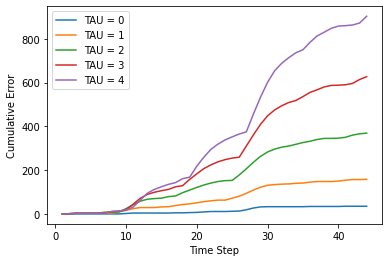

In [13]:
'''
More data processing
'''
# sum up the negative costs for the tower (get total expiration value)
cost_per_tau_over_time = [[] for i in range(TAU_MAX)]
for index,tau in enumerate(completed_states):
    sum_cost = 0
    for time_step in range(len(completed_states[0][0])):
        for tower in tau:
            for expiration in tower[time_step].time_vector:
                if expiration < 0:
                    sum_cost -= expiration 
#                     sum_cost +=1
        cost_per_tau_over_time[index].append(sum_cost)
cost_per_tau_over_time = cost_per_tau_over_time[:5]
'''
first plot:
cummulative expiration cost vs. time step
label with periods of high traffic and low traffic
do a line per tau
'''
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(completed_states[0][0]))]
for tau_num, tau in enumerate(cost_per_tau_over_time):
    plt.plot(x, tau, label = "TAU = " + str(tau_num))
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Cumulative Error')
plt.show()


[4, 9, 10, 13, 18, 19, 20, 43, 46, 47, 50, 54, 57, 61, 61, 82, 86, 89, 90, 93, 95, 100, 105, 134, 139, 144, 145, 145, 149, 153, 156, 170, 172, 172, 175, 177, 178, 179, 182, 195, 0, 0, 0, 0]


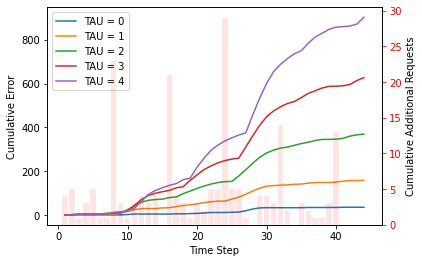

In [17]:
'''
second plot:
cummulative expiration cost vs. time step
label with periods of high traffic and low traffic
do a line per tau
also include a line for the traffic over time
'''
cum_input_len_over_time = [0 for i in x]
for time_step in range(len(input)):
    if time_step > 0:
        cum_input_len_over_time[time_step] = cum_input_len_over_time[time_step-1]  
    for key in input[time_step][0].keys():
        cum_input_len_over_time[time_step] += len(input[time_step][0][key])
print (cum_input_len_over_time)
for i in range(len(input), len(x)):
    cum_input_len_over_time[i] = cum_input_len_over_time[i-1]

fig,ax1 = plt.subplots()
for tau_num, tau in enumerate(cost_per_tau_over_time):
    ax1.plot(x, tau, label = "TAU = " + str(tau_num))
plt.legend()
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Cumulative Error')
input_len_over_time = [0 for i in x]
for time_step in range(len(input)):
    for key in input[time_step][0].keys():
        input_len_over_time[time_step] += len(input[time_step][0][key])
ax2 = ax1.twinx()
ax2.bar(x, input_len_over_time, color='r', alpha=0.1)
# ax2.plot(x, cum_input_len_over_time, 'r.')
ax2.set_ylabel('Cumulative Additional Requests')
ax2.tick_params('y',colors='r')
plt.savefig('data/Realtime/cumulative_error_over_time_with_requests' + str(index) + '.png',dpi=216)

<BarContainer object of 44 artists>

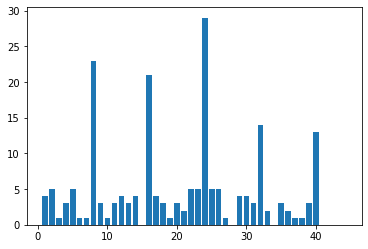

In [15]:
'''
second plot:
traffic over time
'''
input_len_over_time = [0 for i in x]
for time_step in range(len(input)):
    for key in input[time_step][0].keys():
        input_len_over_time[time_step] += len(input[time_step][0][key])
plt.bar(x, input_len_over_time)


In [16]:
'''
timings data
'''
for timings in timing_info:
#     print(timings)
    print(sum(timings))

19.91866812500666
19.4048804510021
24.867802479981037
24.337780812995334
24.664049871003954
